In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
import pickle
import pyprind
import re
from PIL import Image
from IPython.core.display import Image as img
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os
from wordcloud import WordCloud, ImageColorGenerator
import math
from prettytable import PrettyTable as PT
from collections import Counter
import seaborn as sns
from scipy import spatial
import codecs

In [2]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [ ]:
fmri = sns.load_dataset("fmri")

In [ ]:
fmri.head()

In [ ]:
sns.lineplot(x="timepoint", y="signal",hue="event", style="event",markers=True, dashes=False, data=fmri)
plt.show()

In [3]:
PATH_DATA = "V:/Programmazione/Amazon/"

In [33]:
n=10000
df_rev = pd.read_pickle("%sAmazonDataProjectNoText.pkl" % PATH_DATA).head(n=n)
df_rev["sentiment_body"] = np.random.uniform(low=-1, high=1, size=(n,))
df_rev["sentiment_headline"] = np.random.uniform(low=-1, high=1, size=(n,))

In [34]:
df_copy = df_rev.dropna

In [35]:
means = df_rev[['product_category','star_rating','sentiment_body']].groupby(['product_category','star_rating']).mean().reset_index()

In [44]:
new = df_rev[['product_category','star_rating','sentiment_body']].groupby(['product_category','star_rating']).agg({'sentiment_body': ['mean', 'std','count']})

In [37]:
new.columns = new.columns.droplevel(0)

In [38]:
new.columns = ["category", "star_rating", "mean", "std", "count"]

In [49]:
new.head()

sentiment_body                
                                       mean       std count
product_category star_rating                               
Automotive       2                -0.256287       NaN     1
                 5                -0.469423  0.094598     3
Baby             1                 0.099949  0.111502     2
                 3                 0.671614  0.185931     7
                 4                 0.156986  0.595390    16

In [57]:
for (index, star), row in new.iterrows():
    print(index, star,row[0])
    break

(u'Automotive', 2L, -0.2562871871661605, nan)


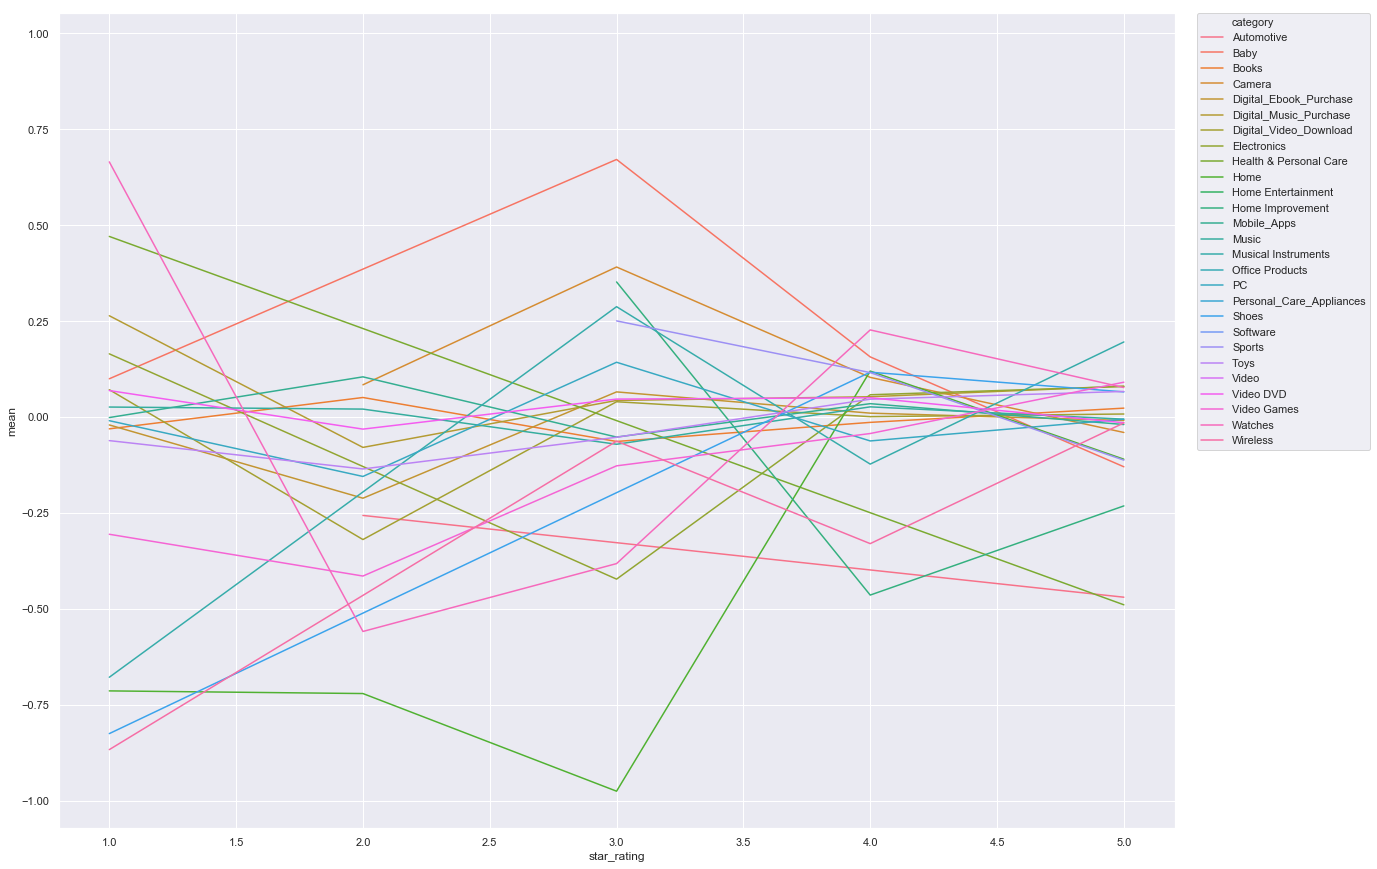

In [43]:
sns.set(rc={'figure.figsize':(20,15)})
sns.lineplot(x="star_rating", 
             y="mean",
             hue="category", 
             markers=True, 
             dashes=True,
             ci="std",
             data=new)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [70]:
matrix = np.zeros([20, 5])
i = 0
for (index, star), row in new.iterrows():
    matrix[i,star-1] = row[0]
    if(star)
    i+=1

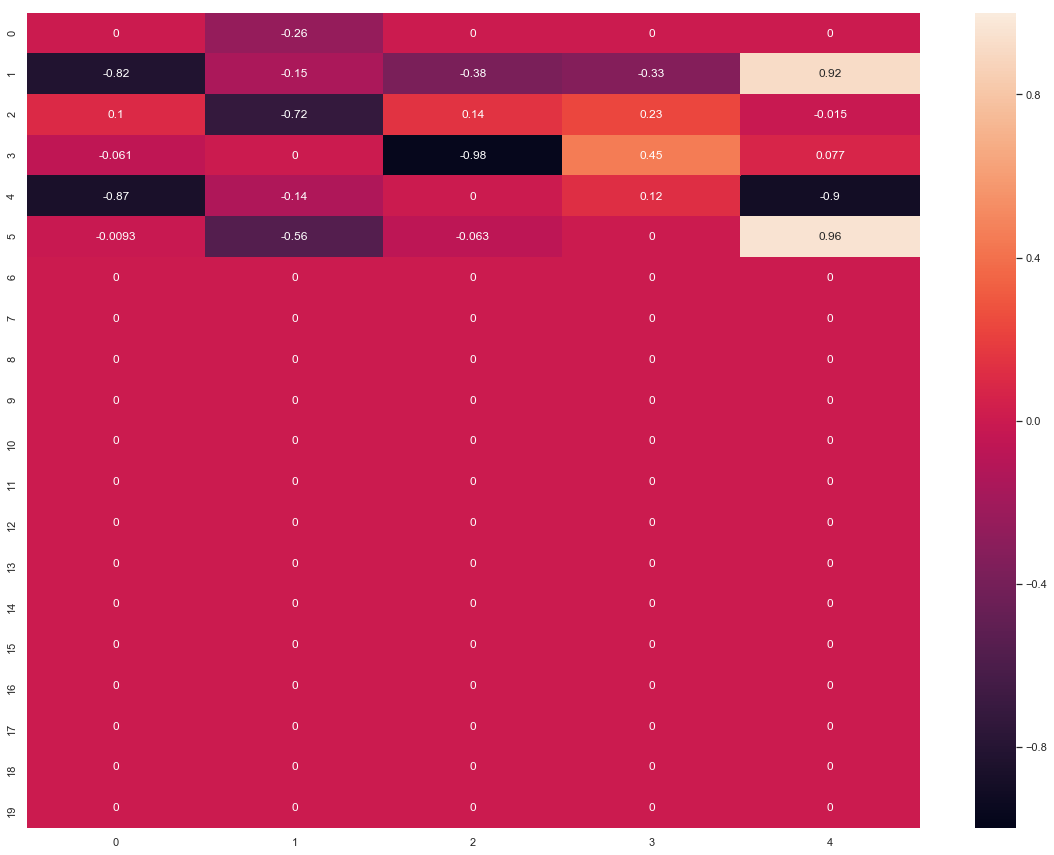

In [72]:
sns.heatmap(matrix, vmin=-1, vmax=1,annot=True)
plt.show()

In [ ]:
new.sentiment_body["count"]

In [8]:
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(x="star_rating", 
             y=new.sentiment_body["mean"],
             hue="product_category",
             data=new)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

SyntaxError: invalid syntax (<ipython-input-8-04338d5fe03e>, line 5)

In [ ]:
dates = df_rev['review_date'].values.astype('datetime64[D]')

In [ ]:
df_rev = df_rev.drop('review_date', axis=1)

In [ ]:
df_rev['review_date'] = dates

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.lineplot(x="review_date", 
             y="sentiment_body",
             hue="product_category", 
             markers=True, 
             dashes=True, 
             data=df_rev)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
plt.plot_date(df_rev.review_date,df_rev.sentiment_body )
plt.show()

In [ ]:
markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
colors = mcolors.CSS4_COLORS.keys()
import matplotlib.colors as mcolors
for i,c in enumerate(categories):
    new2 = new[new.product_category==c]
    plt.scatter(x=new2.star_rating,
                y=new2.sentiment_body["mean"],
                s=new2.sentiment_body["count"],
                color = mcolors.CSS4_COLORS[colors[i]],
                label=c,
                linestyle='-',
                marker=markers[i%len(markers)],
                )
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()